In [1]:
import pandas as pd
from plotnine import *
import os

In [2]:
data_list = []
directory = os.path.join(os.path.dirname("./readings/"), 'round2')

for file in os.listdir(directory):
    if not (file.lower().endswith('.csv')):
        continue
#     print(file)
    df = pd.read_csv(directory + '/' + file)
    data_list.append(df)

In [3]:
all_data = pd.concat(data_list)

In [4]:
df_accs = (
    all_data[all_data.data == 'test']
    [all_data.columns[:4]]
    .dropna(subset=['label', 'data'])
    .groupby(['label', 'data'])
    .agg('mean')
    .assign(loss = lambda x: x['0'])
    .drop(columns=['0'])
    .reset_index()
)
df_accs

,label,data,lr,loss
0,1-layer-0.005-0,test,0.005,4.350255
1,1-layer-0.005-0.1,test,0.005,4.445631
2,1-layer-0.005-0.2,test,0.005,4.432140
3,1-layer-0.005-0.3,test,0.005,4.408294
4,1-layer-0.005-0.4,test,0.005,4.399830
5,1-layer-0.005-0.5,test,0.005,4.334586
6,2-layer-0.005-0,test,0.005,4.267137
7,2-layer-0.005-0.1,test,0.005,4.255241
8,2-layer-0.005-0.2,test,0.005,4.213593
9,2-layer-0.005-0.3,test,0.005,4.317557


In [9]:
df_filt = (
    all_data.dropna()
    .drop(columns=['lr'])
#     .drop(columns=['fold'])
    .melt(id_vars=['label', 'data'], var_name='epoch')
    .assign(epoch = lambda x: x.epoch.astype(int))
    .assign(value = lambda x: x.value.astype(float))
    .groupby(['label', 'data', 'epoch'])
    .agg('mean')
    .reset_index()
)
df_filt

,label,data,epoch,value
0,1-layer-0.005-0,train,0,6.662557
1,1-layer-0.005-0,train,1,6.010678
2,1-layer-0.005-0,train,2,5.650806
3,1-layer-0.005-0,train,3,5.487743
4,1-layer-0.005-0,train,4,5.356969
...,...,...,...,...
2395,4-layer-0.005-0.5,validation,45,7.161614
2396,4-layer-0.005-0.5,validation,46,6.720734
2397,4-layer-0.005-0.5,validation,47,6.823347
2398,4-layer-0.005-0.5,validation,48,6.712540


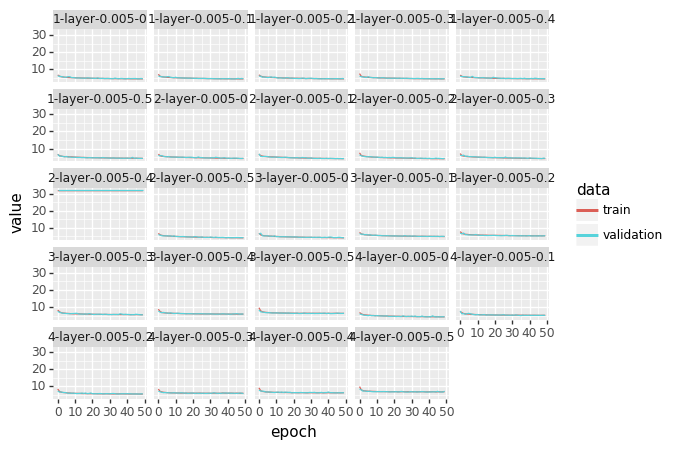

<ggplot: (8789590943541)>

In [10]:
(ggplot(df_filt)
 + aes(x='epoch', y='value', color='data')
 + geom_line()
 + facet_wrap(['label'])
)

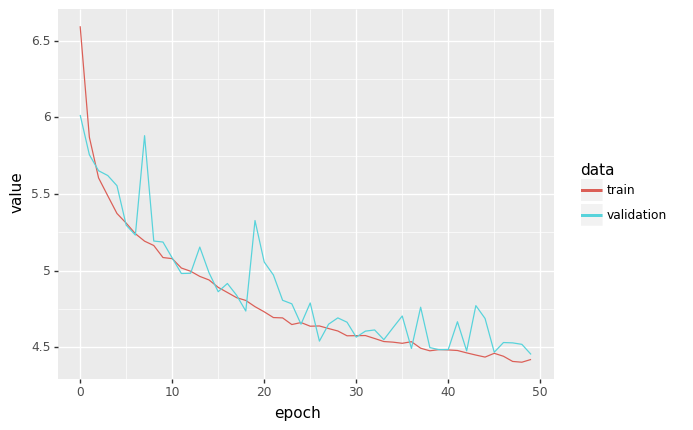

<ggplot: (8789586071737)>

In [16]:
(ggplot(df_filt[df_filt.label == '1-layer-0.005-0.4'])
 + aes(x='epoch', y='value', color='data')
 + geom_line()
#  + facet_wrap(['label'])
)

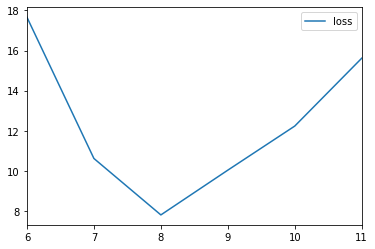

In [127]:
df_accs[df_accs.label.str.contains('2-layer')].drop(columns='data').plot()

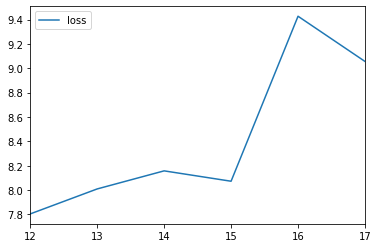

In [128]:
df_accs[df_accs.label.str.contains('3-layer')].drop(columns='data').plot()